## How to do some GIS using Geopandas: 
#### An introduction for novices, by a novice. 
***Purpose:*** To showcase a clean Jupyter notebook that outputs webmap-ready data (GeoJSON).  This notebook will incorporate Geopandas, and a variety of other Python libraries to import, wrangle, analyze, and export data within a typical data-viz and mapping workflow.

###### Created by Ritchie Katko (rakatk0@uky.edu) for [UKy Geography's New Maps Plus](http://newmapsplus.uky.edu/) MAP674 Fall 2019

##### Objective: 
This notebook will fulfill its purpose through the exploration of New York City Police Department's ["Stop, Question, Frisk" Data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) for the year 2016.  This data originates as a CSV, projected in [EPSG:2263 NAD83 / New York Long Island (ftUS)](https://epsg.io/2263). It will have to be cleaned up and reprojected to be ready for analysis against other geospatial data (see below).

Please note the following: The data wrangling and analysis performed in this notebook is intended to function as a geopandas tutorial, rather than as a piece of data-journalism. 

Data utilized in this notebook: 
- [NYC Borough Boundaries](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)
- [NYPD Precinct Boundaries](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz)
- [NYC Census Block Boundaries](https://data.cityofnewyork.us/City-Government/2010-Census-Blocks/v2h8-6mxf)
- [DSNY Graffiti Locations](https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking/gpwd-npar)
- [NYC Bus Stop Shelter Locations](https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz)


#### Setting up the environment
Here's my background specs: 
- ***OS***: Ubuntu 16.04.6 LTS
- ***Python version***: `$ /usr/bin/python3 -V` 3.5.2
- ***Anaconda3 version***: `$ conda info` 4.5.11

###### Conda Environment 
The following packages must be installed (`$ conda install`) into the active Conda environment:
- `Jupyter` (allows use of jupyter coding environment
- `Geopandas` (integrates other packages geospatial components) 
- `Matplotlib` (dataviz package - allows plotting of visualizations)

##### after activating the Conda Environment of choice, navigate to the working directory and run `jupyter notebook` to initiate the browser-based notebook environment.  

##### Now, let's get to work: 

##### Add packages to allow for their use in this environment

In [1]:
# import packages, using aliases to simplify code
import pandas as pd
import numpy as np

##### load local data
    load csv into notebook as dataframe 'df'.  using `type()` will return the type of data. 

In [2]:
# load csv into notebook as dataframe 'df', and check the data  
path_to_file = './data/sqf-2016.csv'
# url version: path_to_file = 'https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2016.csv'

df = pd.read_csv(path_to_file,  dtype = str) # load csv data as pandas DataFrame, load # dtype = str, 
type(df)

pandas.core.frame.DataFrame

##### take a look at the data, from a few angles

In [3]:
df.shape, df.sample(1)  # shape will return the number of rows, and columns.  .sample() will return a random row

((12405, 112),
       year  pct ser_num datestop timestop recstat inout trhsloc perobs  \
 9988  2016  113     107  8182016     2339       A     O       P   3.00   
 
          crimsusp  ... zip addrpct sector beat post   xcoord   ycoord  \
 9988  MISDEMEANOR  ...         113      B            1053088   187992   
 
      dettypCM lineCM detailCM  
 9988       CM      1       20  
 
 [1 rows x 112 columns])

In [4]:
df.head(), df.tail()

(   year pct ser_num datestop timestop recstat inout trhsloc perobs  \
 0  2016  41      22  2072016      100       A     O       P   1.00   
 1  2016  10      22  2182016       30       1     O       P   8.00   
 2  2016  66       1  1012016       30       1     I       P   2.00   
 3  2016  47      18  1012016       40       1     O       H   1.00   
 4  2016  79       1  1012016       50       1     O       P   3.00   
 
       crimsusp  ... zip addrpct sector beat post   xcoord   ycoord dettypCM  \
 0         BURG  ...          41      B    2       1013353   234000       CM   
 1  MISDEMEANOR  ...          10      D             983478   212373       CM   
 2          FEL  ...          66      F             988340   172111       CM   
 3          FEL  ...          47      C                                   CM   
 4       D.W.I.  ...          79      G    4        998197   187413       CM   
 
   lineCM detailCM  
 0      1       14  
 1      1       28  
 2      1        9  
 3    

In [5]:
list(df.columns) # take a look at all the columns

['year',
 'pct',
 'ser_num',
 'datestop',
 'timestop',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'crimsusp',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',


##### are there any columns we don't care about that can be removed?   
This dataset has granular detail on 12000+ incidents.  Let's simplify this. Taking a look at a key provided for this data, there are a  

In [6]:
df = df.drop(columns=['year',
 'ser_num',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'adtlrept',
 'riflshot',
 'asltweap',
 'machgun',
 'othrweap',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',
 'dob',
 'ht_feet',
 'ht_inch',
 'weight',
 'haircolr',
 'eyecolor',
 'build',
 'othfeatr',
 'addrtyp',
 'rescode',
 'premtype',
 'premname',
 'addrnum',
 'stname',
 'stinter',
 'crossst',
 'aptnum',
 'city',
 'state',
 'zip',
 'addrpct',
 'sector',
 'beat',
 'post',
 'dettypCM',
 'lineCM',
 'detailCM'])

In [7]:
type(df.arstmade[0])

str

In [8]:
list(df.columns)

['pct',
 'datestop',
 'timestop',
 'crimsusp',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'frisked',
 'searched',
 'contrabn',
 'pistol',
 'knifcuti',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'sex',
 'race',
 'age',
 'xcoord',
 'ycoord']

##### lets create a few new columns. was the person innocent?  and, was the person carrying a pistol or knife?  and, was force used by the police? 

In [9]:
# Create a new column called df.crime where the value is yes
# if df.arstmade or df.sumissue are Y

#df['crime'] = np.where((df['arstmade'] == 'Y')|(df['sumissue'] == df['Y']), 'yes', 'no')

#df['weapon'] = np.where((df['pistol'] == 'Y')|(df['knifcuti'] == df['N']), 'yes', 'no')
#df['force_used'] = np.where((df['pf_hands'] == 'Y')|
                          #  (df['pf_wall'] == df['Y'])|
                          #  (df['pf_grnd'] == df['Y'])|
                          #  (df['pf_drwep'] == df['Y'])|
                          #  (df['pf_ptwep'] == df['Y'])|
                           # (df['pf_baton'] == df['Y'])|
                           # (df['pepsp'] == df['Y'])|
                           # (df['pf_other'] == df['Y']), 'yes', 'no')


##### after taking a look at the data and identifying some coordinates, further inspect the geometry columns.

These are labeled `xcoord` and `ycoord`.  Let's figure out what type of data this is using `type()`


In [10]:
# check datatype of 'xcoord' & 'ycoord'
type(df.xcoord[1]), type(df.ycoord[1]) # str

(str, str)

##### since these are strings, removing extra spaces that may be lingering is necessary before converting over to a numerical type

In [11]:
#remove extra spaces in strings
df["xcoord"] = df["xcoord"].map(str.strip)  
df["ycoord"] = df["ycoord"].map(str.strip)
df["datestop"] = df["datestop"].map(str.strip)
df["timestop"] = df["timestop"].map(str.strip)
df["pct"] = df["pct"].map(str.strip)

In [12]:
# lets look at the first 5 rows of data in this column
df.xcoord.head(), df.ycoord.head()  # and we see the 4th row has no coordinate in either

(0    1013353
 1     983478
 2     988340
 3           
 4     998197
 Name: xcoord, dtype: object, 0    234000
 1    212373
 2    172111
 3          
 4    187413
 Name: ycoord, dtype: object)

##### Finding an empty row  in the first 5 of 12405 rows is _sheer luck_. If the first 5 rows were geocoded, that error would not have been observed. How could we search for these? 

Since these are `str`, they won't have any `'NaN'` values.  Rather than visually parse this for bad data, lets assume that any cells without coordinates have some other value within them (or are empty strings, especially since we stripped zeros).  If we sort for the most frequent value in this column, it might return a default string value when there is no location information.

In [13]:
# check to see what the most common value
# .idxmax() returns the most common value in a column
df.xcoord.value_counts().idxmax(), df.ycoord.value_counts().idxmax()  # answer will an empty string value ('')

('', '')

##### after identifying the cell value that indicates ***not geocoded***,  now remove ungeocoded cells from the dataframe

In [14]:
# replace empty strings with NaN
df['xcoord'].replace('', np.nan, inplace=True)
df['ycoord'].replace('', np.nan, inplace=True)
df.shape # check number of rows here for comparison with result of next step

(12405, 27)

In [15]:
# Now drop the null values
df.dropna(subset=['xcoord'], inplace=True)
df.dropna(subset=['ycoord'], inplace=True)
df.shape # check number of rows here for comparison with result of previous step to verify removal

(12053, 27)

In [16]:
# to be useful later, we need numerical values (for now, integers), not Strings. Converting the coordinates into numerical values is paramount. 
# convert strings to integers
df.xcoord = pd.to_numeric(df.xcoord, errors='ignore')
df.ycoord = pd.to_numeric(df.ycoord, errors='ignore')
type(df.xcoord[1])

numpy.int64

In [17]:
# check data type
type(df.datestop[0])

str

##### After deleting some rows, reset the index.  But before that happens, reordering chronologically might be useful.  

In [18]:
# convert date strings to integers  & sort chronologically
df['datestop'] = df['datestop'].apply(int) # convert date to integer
df.sort_values(by=['datestop'],inplace = True) # sort dataframe by 'date', will sort smallest to largest value, so january 1 will be first! 

In [19]:
# reset index
df = df.reset_index()

# delete prior index
del df['index'] 
print(df.datestop.head())  #note these first 5 values are all on jan 1 2016, verifying it worked! 

0    1012016
1    1012016
2    1012016
3    1012016
4    1012016
Name: datestop, dtype: int64


In [20]:
# stash the data locally as json
with open('./data/2016stops.json', 'w') as f:
    f.write(df.to_json())

##### now verify the file was written 

In [21]:
# imports the OS module, using the .walk() method returns information about the current working directory. 
import os
for root, dirs, files in os.walk('./data/'):
    for filename in files:
        print(filename)

2016stops.geojson
sqf-2016.csv
nyc-boroughs.geojson
2016stops.json
nypd-precincts.geojson


#### so, we've got a JSON.  To continue, we'll need to define geometry for this using Shapely, prior to converting into a GeoDataFrame for all our awesome web-mapping applications downstream.  

Importing geopandas and shapely modules will allow convert coordinates into points with a projection.  

In [22]:
import geopandas as gpd
from shapely.geometry import Point

access JSON that we created and stashed locally and load as dataframe

In [23]:
path_to_file = './data/2016stops.json'
df = pd.read_json(path_to_file) # load csv data as pandas DataFrame
type(df), df.head()

(pandas.core.frame.DataFrame,
    pct  datestop  timestop     crimsusp arstmade           arstoffn sumissue  \
 0  115   1012016      2012     BURGLARY        Y  CRIMINAL TRESPASS        N   
 1   81   1012016      1525       FELONY        N                           N   
 2   81   1012016      1535       FELONY        N                           N   
 3   14   1012016      1645          FEL        N                           N   
 4   90   1012016      1700  MISDEMEANOR        N                           N   
 
   sumoffen frisked searched  ... pf_ptwep pf_baton pf_hcuff pf_pepsp pf_other  \
 0                Y        Y  ...        N        N        Y        N        N   
 1                Y        Y  ...        N        N        N        N        N   
 2                Y        Y  ...        N        N        N        N        N   
 3                Y        N  ...        N        N        N        N        N   
 4                N        N  ...        N        N        N        N   

##### create the geometry...
this requires us to know the projection that the `xcoord` and `ycoord` were presented.  after a bit of digging, I was able to determine that NYPD used ESPG:2263 as the projected coordinate system.  

In [24]:
# create geometry using Shapely Point & assign proper projection
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
df = df.drop(['xcoord', 'ycoord'], axis=1)
crs = {'init': 'epsg:2263'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf.head()

,pct,datestop,timestop,crimsusp,arstmade,arstoffn,sumissue,sumoffen,frisked,searched,...,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,sex,race,age,geometry
0,115,1012016,2012,BURGLARY,Y,CRIMINAL TRESPASS,N,,Y,Y,...,N,N,N,Y,N,N,M,Q,29,POINT (1021102 213296)
1,81,1012016,1525,FELONY,N,,N,,Y,Y,...,N,N,N,N,N,N,M,B,21,POINT (1006272 189184)
2,81,1012016,1535,FELONY,N,,N,,Y,Y,...,N,N,N,N,N,N,M,B,22,POINT (1006272 189184)
3,14,1012016,1645,FEL,N,,N,,Y,N,...,N,N,N,N,N,N,M,W,20,POINT (987866 214721)
4,90,1012016,1700,MISDEMEANOR,N,,N,,N,N,...,N,N,N,N,N,N,M,W,25,POINT (1002739 196254)


##### reproject data to web-map ready EPSG:4326

In [25]:
gdf.to_crs(epsg=4326, inplace=True)
#gdf.to_crs({'init': 'epsg:4269'})
gdf.crs

{'init': 'epsg:4326', 'no_defs': True}

##### visualize the data (are we mapping yet?), but first we'll need some plotting tools. 

In [26]:
# import plotter 
%matplotlib inline

import matplotlib.pyplot as plt
# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

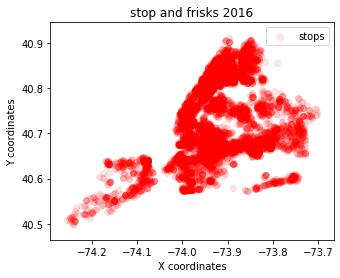

In [27]:
fig, ax = plt.subplots()
 
base_color = '#f0f0f0'
border_color = base_color
 
gdf.plot(ax=ax, color='red', alpha=0.1, zorder=0, label='stops');  #low opacity adds a heatmap effect at this scale.  unintentional
 
ax.set(title="stop and frisks 2016",
       xlabel="X coordinates",
       ylabel="Y coordinates") 
ax.legend();

#### bring in some other data to see if everything appears to be in order

In [28]:
# import datasets
pr = gpd.read_file('./data/nypd-precincts.geojson') # import precincts geometry
bo = gpd.read_file('./data/nyc-boroughs.geojson') # import precincts geometry

In [29]:
# check CRS on each
pr.crs, bo.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

In [30]:
# to be useful later, we need numerical values (for now, integers), not Strings. Converting the coordinates into numerical values is paramount. 
# convert strings to integers
pr.precinct = pd.to_numeric(pr.precinct, errors='ignore')
type(pr.precinct[1]), pr.precinct.head(), pr.total_bounds

(numpy.int64, 0     1
 1     5
 2     6
 3    71
 4    72
 Name: precinct, dtype: int64, array([-74.25559136,  40.4961154 , -73.70000906,  40.91553278]))

[(40.25, 41), (-74.3, -73.6)]

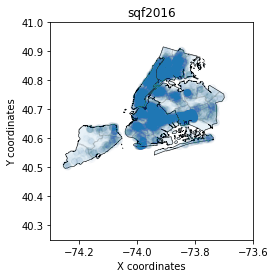

In [39]:
fig, ax = plt.subplots()
 
base_color = '#f0f0f0'
border_color = base_color

# layers to print
pr.plot(ax=ax, edgecolor='black', alpha=0.1, zorder=2);
gdf.plot(ax=ax, alpha=0.01, zorder=3);  #low opacity adds a heatmap effect at this scale.
bo.plot(ax=ax, edgecolor='black', linewidth=.5, color='white', alpha=1, zorder=1);

# add title and labels
ax.set(title="sqf2016",
       xlabel="X coordinates",
       ylabel="Y coordinates") 

# reset bounds to match NYC data
ax.set(xlim=(-74.3,-73.6), ylim=(40.25,41))




In [32]:
# try to pull bounds to reuse in function? 
#array = pr.total_bounds # this returns a numpy array
#bounds = np.array(array).tolist()

what about zooming into a single precinct and looking at the temporal aspect? 

quickly take a look at `pr` Precincts

In [33]:
#stacking these data inspection commands is possible using commas
pr.sort_values(by=['precinct'],inplace = True),pr.head(),type(pr.precinct[0]),pr.precinct[0]

(None,    precinct     shape_area     shape_leng  \
 0         1  47313318.0761  80563.0640816   
 1         5  18088797.9526  18676.1242594   
 2         6  22098189.8026  26402.9006691   
 5         7  18364020.9154  17301.3086822   
 6         9  21394233.7415  19773.2334096   
 
                                             geometry  
 0  (POLYGON ((-74.0438776157395 40.69018767637665...  
 1  (POLYGON ((-73.98863862848766 40.7229337202636...  
 2  (POLYGON ((-73.99968392160721 40.7385522486597...  
 5  (POLYGON ((-73.97345389423181 40.718962954076,...  
 6  (POLYGON ((-73.97160900246391 40.7267234011698...  , numpy.int64, 1)

In [34]:
# to be useful later, we need numerical values (for now, integers), not Strings. Converting the coordinates into numerical values is paramount. 
# convert strings to integers
#pr.precinct = pd.to_numeric(pr.precinct, errors='ignore')

# convert date strings to integers  & sort chronologically
pr['precinct'] = pr['precinct'].apply(int) # convert date to integer
pr.sort_values(by=['precinct'],inplace = True) # sort dataframe by 'date', will sort smallest to largest value, so january 1 will be first! 
pr = pr.reset_index()
del pr['index'] 
type(pr.precinct[1]), pr.head()


(numpy.int64,    precinct     shape_area     shape_leng  \
 0         1  47313318.0761  80563.0640816   
 1         5  18088797.9526  18676.1242594   
 2         6  22098189.8026  26402.9006691   
 3         7  18364020.9154  17301.3086822   
 4         9  21394233.7415  19773.2334096   
 
                                             geometry  
 0  (POLYGON ((-74.0438776157395 40.69018767637665...  
 1  (POLYGON ((-73.98863862848766 40.7229337202636...  
 2  (POLYGON ((-73.99968392160721 40.7385522486597...  
 3  (POLYGON ((-73.97345389423181 40.718962954076,...  
 4  (POLYGON ((-73.97160900246391 40.7267234011698...  )

##### export this data as webmap ready GEOJSON

In [35]:
#export as geojson 
### throws an error unless file is deleted prior
gdf.to_file(r'./data/2016stops.geojson', driver="GeoJSON")

In [36]:
#double check the data, for ASMR purposes alone
for root, dirs, files in os.walk('./data/'):
    for filename in files:
        print(filename)

2016stops.geojson
sqf-2016.csv
nyc-boroughs.geojson
2016stops.json
nypd-precincts.geojson
